In [1]:
import matplotlib.pyplot as plt
import numpy as np

import jax
import jax.numpy as jnp
import jax.random as random

import numpyro
import numpyro.distributions as dist
import numpyro.optim as optim
from numpyro.infer import SVI, Trace_ELBO
from numpyro.infer.autoguide import AutoLaplaceApproximation, AutoNormal

from q3_02_gp_functions import *

from jax import random, grad

plt.style.use("seaborn-v0_8")

rng_key, rng_key_ = random.split(random.PRNGKey(0))

In [2]:
from q3_02_gp_functions import *
import numpy as np

def simulate_alex(description_length: float, playback_speed: float) -> float:
    """
    Returns a user satisfaction score between 0 and 1, modeled on Persona A: Alex
    
    description_length: in [0, 100]
    playback_speed:     in [0, 100]
    """
    assert 0 <= description_length <= 100, f"Invalid description_length: {description_length}"
    assert 0 <= playback_speed <= 100, f"Invalid playback_speed: {playback_speed}"

    TRUE_DESCRIPTION_LENGTH_MEAN = 20
    TRUE_DESCRIPTION_LENGTH_VAR = 10
    TRUE_PLAYBACK_SPEED_MEAN = 80
    TRUE_PLAYBACK_SPEED_VAR = 10
    NOISE_LEVEL = 0.1

    desc_satisfaction = np.exp(-((description_length - TRUE_DESCRIPTION_LENGTH_MEAN) ** 2) / (2 * TRUE_DESCRIPTION_LENGTH_VAR ** 2))
    speed_satisfaction = np.exp(-((playback_speed - TRUE_PLAYBACK_SPEED_MEAN) ** 2) / (2 * TRUE_PLAYBACK_SPEED_VAR ** 2))

    # Final satisfaction score is the product of both decay functions
    satisfaction = desc_satisfaction * speed_satisfaction

    satisfaction += np.random.normal(0, NOISE_LEVEL)


    return min(max(0, float(satisfaction)), 1.0)

def simulate_ben(description_length: float, playback_speed: float) -> float:
    """
    Returns a user satisfaction score between 0 and 1, modeled on Persona B: Ben
    
    description_length: in [0, 100]
    playback_speed:     in [0, 100]
    """
    assert 0 <= description_length <= 100, f"Invalid description_length: {description_length}"
    assert 0 <= playback_speed <= 100, f"Invalid playback_speed: {playback_speed}"

    TRUE_DESCRIPTION_LENGTH_MEAN = 80
    TRUE_DESCRIPTION_LENGTH_VAR = 10
    TRUE_PLAYBACK_SPEED_MEAN = 20
    TRUE_PLAYBACK_SPEED_VAR = 10
    NOISE_LEVEL = 0.1

    desc_satisfaction = np.exp(-((description_length - TRUE_DESCRIPTION_LENGTH_MEAN) ** 2) / (2 * TRUE_DESCRIPTION_LENGTH_VAR ** 2))
    speed_satisfaction = np.exp(-((playback_speed - TRUE_PLAYBACK_SPEED_MEAN) ** 2) / (2 * TRUE_PLAYBACK_SPEED_VAR ** 2))

    # Final satisfaction score is the product of both decay functions
    satisfaction = desc_satisfaction * speed_satisfaction

    satisfaction += np.random.normal(0, NOISE_LEVEL)


    return min(max(0, float(satisfaction)), 1.0)

In [3]:
NUM_CANDIDATE_SAMPLES = 100
NUM_ITERATIONS = 20
LEARNING_RATE = 1e-3

### Alex related GP

In [4]:
# Initial Dataset # Not required
rng_key, rng_key_ = random.split(rng_key)
X_a, Y_a, _, _ = get_data(simulate_alex, rng_key, num_samples=20)

In [5]:
rng_key, rng_key_ = random.split(rng_key)
alex_data = train_gp(rng_key, X_a, Y_a, NUM_ITERATIONS, LEARNING_RATE, NUM_CANDIDATE_SAMPLES, simulate_alex)


 Iteration 0


100%|██████████| 1000/1000 [00:01<00:00, 781.26it/s, init loss: 729.7482, avg. loss [951-1000]: 425.9952]


Best observed value so far: 0.21962383389472961
Next candidate selected: [14 97]
Simulation output at candidate: 0.1221601508579497

 Iteration 1


100%|██████████| 1000/1000 [00:01<00:00, 798.50it/s, init loss: 38.8376, avg. loss [951-1000]: 29.0900]


Best observed value so far: 0.21962383389472961
Next candidate selected: [15 98]
Simulation output at candidate: 0.037160644259921743

 Iteration 2


100%|██████████| 1000/1000 [00:01<00:00, 881.02it/s, init loss: 55.6382, avg. loss [951-1000]: 43.6315]


Best observed value so far: 0.21962383389472961
Next candidate selected: [ 47 100]
Simulation output at candidate: 0

 Iteration 3


100%|██████████| 1000/1000 [00:01<00:00, 857.90it/s, init loss: 57.0661, avg. loss [951-1000]: 42.9567]


Best observed value so far: 0.21962383389472961
Next candidate selected: [21 74]
Simulation output at candidate: 0.7797464541004967

 Iteration 4


100%|██████████| 1000/1000 [00:01<00:00, 858.30it/s, init loss: 59.5857, avg. loss [951-1000]: 43.3824]


Best observed value so far: 0.7797464728355408
Next candidate selected: [16 76]
Simulation output at candidate: 0.9945845871366257

 Iteration 5


100%|██████████| 1000/1000 [00:01<00:00, 865.40it/s, init loss: 53.9760, avg. loss [951-1000]: 36.3723]


Best observed value so far: 0.9945845603942871
Next candidate selected: [12 70]
Simulation output at candidate: 0.513366014507241

 Iteration 6


100%|██████████| 1000/1000 [00:01<00:00, 802.93it/s, init loss: 29.2289, avg. loss [951-1000]: 18.8863] 


Best observed value so far: 0.9945845603942871
Next candidate selected: [31 65]
Simulation output at candidate: 0

 Iteration 7


100%|██████████| 1000/1000 [00:01<00:00, 809.02it/s, init loss: 39.9559, avg. loss [951-1000]: 21.9313]


Best observed value so far: 0.9945845603942871
Next candidate selected: [18 79]
Simulation output at candidate: 1.0

 Iteration 8


100%|██████████| 1000/1000 [00:01<00:00, 839.86it/s, init loss: 69.2057, avg. loss [951-1000]: 54.2945]


Best observed value so far: 1.0
Next candidate selected: [17 82]
Simulation output at candidate: 0.8103285980549664

 Iteration 9


100%|██████████| 1000/1000 [00:01<00:00, 719.74it/s, init loss: 50.9048, avg. loss [951-1000]: 36.3295]


Best observed value so far: 1.0
Next candidate selected: [18 82]
Simulation output at candidate: 0.8400440670517418

 Iteration 10


100%|██████████| 1000/1000 [00:01<00:00, 819.28it/s, init loss: 74.9851, avg. loss [951-1000]: 56.6528]


Best observed value so far: 1.0
Next candidate selected: [23 83]
Simulation output at candidate: 1.0

 Iteration 11


100%|██████████| 1000/1000 [00:01<00:00, 797.74it/s, init loss: 62.7581, avg. loss [951-1000]: 45.6089]


Best observed value so far: 1.0
Next candidate selected: [17 77]
Simulation output at candidate: 0.8693117079979079

 Iteration 12


100%|██████████| 1000/1000 [00:02<00:00, 396.51it/s, init loss: 72.8248, avg. loss [951-1000]: 54.4452]


Best observed value so far: 1.0
Next candidate selected: [22 79]
Simulation output at candidate: 0.9170511938521482

 Iteration 13


100%|██████████| 1000/1000 [00:02<00:00, 374.36it/s, init loss: 50.0304, avg. loss [951-1000]: 34.2712]


Best observed value so far: 1.0
Next candidate selected: [18 77]
Simulation output at candidate: 0.7550907478626471

 Iteration 14


100%|██████████| 1000/1000 [00:02<00:00, 361.69it/s, init loss: 55.0920, avg. loss [951-1000]: 34.4468]


Best observed value so far: 1.0
Next candidate selected: [29 86]
Simulation output at candidate: 0.5230923215993928

 Iteration 15


100%|██████████| 1000/1000 [00:02<00:00, 355.82it/s, init loss: 53.5106, avg. loss [951-1000]: 33.5343]


Best observed value so far: 1.0
Next candidate selected: [21 81]
Simulation output at candidate: 0.8595643768428729

 Iteration 16


100%|██████████| 1000/1000 [00:03<00:00, 294.91it/s, init loss: 79.7710, avg. loss [951-1000]: 62.2096]


Best observed value so far: 1.0
Next candidate selected: [23 77]
Simulation output at candidate: 0.826937480546003

 Iteration 17


100%|██████████| 1000/1000 [00:03<00:00, 256.52it/s, init loss: 74.3196, avg. loss [951-1000]: 54.4712]


Best observed value so far: 1.0
Next candidate selected: [25 82]
Simulation output at candidate: 0.801394386257863

 Iteration 18


100%|██████████| 1000/1000 [00:02<00:00, 367.86it/s, init loss: 81.2729, avg. loss [951-1000]: 59.5892]


Best observed value so far: 1.0
Next candidate selected: [18 81]
Simulation output at candidate: 1.0

 Iteration 19


100%|██████████| 1000/1000 [00:04<00:00, 244.01it/s, init loss: 56.4991, avg. loss [951-1000]: 40.6855]


Best observed value so far: 1.0
Next candidate selected: [24 82]
Simulation output at candidate: 0.8398923804928197

=== Convergence History (Best value over iterations) ===
Iteration 0: 0.2196
Iteration 1: 0.1222
Iteration 2: 0.0372
Iteration 3: 0.0000
Iteration 4: 0.7797
Iteration 5: 0.9946
Iteration 6: 0.5134
Iteration 7: 0.0000
Iteration 8: 1.0000
Iteration 9: 0.8103
Iteration 10: 0.8400
Iteration 11: 1.0000
Iteration 12: 0.8693
Iteration 13: 0.9171
Iteration 14: 0.7551
Iteration 15: 0.5231
Iteration 16: 0.8596
Iteration 17: 0.8269
Iteration 18: 0.8014
Iteration 19: 1.0000
Iteration 20: 0.8399


### Ben related GP

In [6]:
# Initial Dataset # Not required
rng_key, rng_key_ = random.split(rng_key)
X_b, Y_b, _, _ = get_data(simulate_ben, rng_key, num_samples=20)

In [7]:
rng_key, rng_key_ = random.split(rng_key)
ben_data = train_gp(rng_key, X_b, Y_b, NUM_ITERATIONS, LEARNING_RATE, NUM_CANDIDATE_SAMPLES, simulate_ben)


 Iteration 0


100%|██████████| 1000/1000 [00:01<00:00, 788.91it/s, init loss: 624.2192, avg. loss [951-1000]: 417.2575]


Best observed value so far: 0.6946632862091064
Next candidate selected: [54 83]
Simulation output at candidate: 0.08304305422524438

 Iteration 1


100%|██████████| 1000/1000 [00:01<00:00, 753.42it/s, init loss: 43.0882, avg. loss [951-1000]: 28.9829]


Best observed value so far: 0.6946632862091064
Next candidate selected: [84  0]
Simulation output at candidate: 0.11879418650629253

 Iteration 2


100%|██████████| 1000/1000 [00:01<00:00, 720.29it/s, init loss: 35.6430, avg. loss [951-1000]: 22.3608]


Best observed value so far: 0.6946632862091064
Next candidate selected: [80 16]
Simulation output at candidate: 0.8018914254242187

 Iteration 3


100%|██████████| 1000/1000 [00:01<00:00, 781.85it/s, init loss: 54.8577, avg. loss [951-1000]: 40.6592]


Best observed value so far: 0.8018914461135864
Next candidate selected: [77 14]
Simulation output at candidate: 0.8097068558858295

 Iteration 4


100%|██████████| 1000/1000 [00:01<00:00, 775.89it/s, init loss: 32.6386, avg. loss [951-1000]: 20.6472]


Best observed value so far: 0.8097068667411804
Next candidate selected: [89 28]
Simulation output at candidate: 0.5476668190433515

 Iteration 5


100%|██████████| 1000/1000 [00:01<00:00, 820.27it/s, init loss: 44.2104, avg. loss [951-1000]: 28.1588]


Best observed value so far: 0.8097068667411804
Next candidate selected: [74 12]
Simulation output at candidate: 0.49400291370089466

 Iteration 6


100%|██████████| 1000/1000 [00:01<00:00, 752.75it/s, init loss: 53.0108, avg. loss [951-1000]: 37.8186]


Best observed value so far: 0.8097068667411804
Next candidate selected: [81 30]
Simulation output at candidate: 0.5242585778595471

 Iteration 7


100%|██████████| 1000/1000 [00:01<00:00, 823.90it/s, init loss: 58.9636, avg. loss [951-1000]: 41.4851]


Best observed value so far: 0.8097068667411804
Next candidate selected: [74 18]
Simulation output at candidate: 0.9186813266657408

 Iteration 8


100%|██████████| 1000/1000 [00:01<00:00, 740.34it/s, init loss: 51.7902, avg. loss [951-1000]: 32.4672]


Best observed value so far: 0.9186813235282898
Next candidate selected: [78 16]
Simulation output at candidate: 0.9020926790951024

 Iteration 9


100%|██████████| 1000/1000 [00:01<00:00, 774.42it/s, init loss: 27.6286, avg. loss [951-1000]: 13.4652]


Best observed value so far: 0.9186813235282898
Next candidate selected: [82 20]
Simulation output at candidate: 0.7526841718017127

 Iteration 10


100%|██████████| 1000/1000 [00:01<00:00, 680.22it/s, init loss: 78.6211, avg. loss [951-1000]: 62.8522]


Best observed value so far: 0.9186813235282898
Next candidate selected: [78 20]
Simulation output at candidate: 0.9814376777446897

 Iteration 11


100%|██████████| 1000/1000 [00:01<00:00, 795.64it/s, init loss: 31.8985, avg. loss [951-1000]: 21.0822]


Best observed value so far: 0.9814376831054688
Next candidate selected: [82 18]
Simulation output at candidate: 0.988324828390073

 Iteration 12


100%|██████████| 1000/1000 [00:03<00:00, 286.65it/s, init loss: 52.6816, avg. loss [951-1000]: 37.2978]


Best observed value so far: 0.9883248209953308
Next candidate selected: [79 16]
Simulation output at candidate: 0.7568766903984436

 Iteration 13


100%|██████████| 1000/1000 [00:03<00:00, 317.56it/s, init loss: 77.4494, avg. loss [951-1000]: 59.5417]


Best observed value so far: 0.9883248209953308
Next candidate selected: [99 24]
Simulation output at candidate: 0.02815648953264477

 Iteration 14


100%|██████████| 1000/1000 [00:03<00:00, 310.35it/s, init loss: 39.8162, avg. loss [951-1000]: 26.9846]


Best observed value so far: 0.9883248209953308
Next candidate selected: [83 18]
Simulation output at candidate: 0.9911161310182363

 Iteration 15


100%|██████████| 1000/1000 [00:03<00:00, 333.19it/s, init loss: 75.4407, avg. loss [951-1000]: 59.8753]


Best observed value so far: 0.9911161065101624
Next candidate selected: [73 15]
Simulation output at candidate: 0.739308918613061

 Iteration 16


100%|██████████| 1000/1000 [00:03<00:00, 320.83it/s, init loss: 71.3991, avg. loss [951-1000]: 51.6742]


Best observed value so far: 0.9911161065101624
Next candidate selected: [74 14]
Simulation output at candidate: 0.7456937790244289

 Iteration 17


100%|██████████| 1000/1000 [00:03<00:00, 291.31it/s, init loss: 66.2283, avg. loss [951-1000]: 48.2011]


Best observed value so far: 0.9911161065101624
Next candidate selected: [88 30]
Simulation output at candidate: 0.40655558081500587

 Iteration 18


100%|██████████| 1000/1000 [00:03<00:00, 295.33it/s, init loss: 64.4472, avg. loss [951-1000]: 50.8861]


Best observed value so far: 0.9911161065101624
Next candidate selected: [78 32]
Simulation output at candidate: 0.6173424469896669

 Iteration 19


100%|██████████| 1000/1000 [00:03<00:00, 257.80it/s, init loss: 79.4300, avg. loss [951-1000]: 58.8254]


Best observed value so far: 0.9911161065101624
Next candidate selected: [73 10]
Simulation output at candidate: 0.5286517330450439

=== Convergence History (Best value over iterations) ===
Iteration 0: 0.6947
Iteration 1: 0.0830
Iteration 2: 0.1188
Iteration 3: 0.8019
Iteration 4: 0.8097
Iteration 5: 0.5477
Iteration 6: 0.4940
Iteration 7: 0.5243
Iteration 8: 0.9187
Iteration 9: 0.9021
Iteration 10: 0.7527
Iteration 11: 0.9814
Iteration 12: 0.9883
Iteration 13: 0.7569
Iteration 14: 0.0282
Iteration 15: 0.9911
Iteration 16: 0.7393
Iteration 17: 0.7457
Iteration 18: 0.4066
Iteration 19: 0.6173
Iteration 20: 0.5287


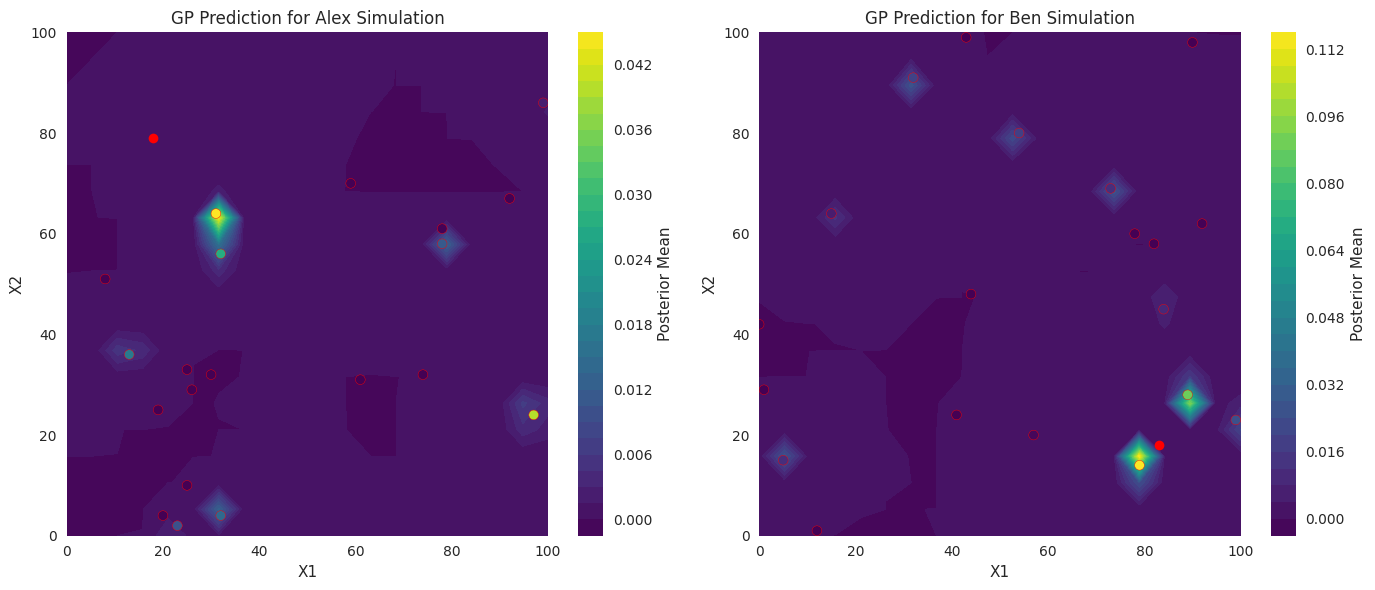

In [8]:
rng_key, rng_key_ = random.split(rng_key)

x_grid = np.linspace(0, 100, 20)  # Range for input
y_grid = np.linspace(0, 100, 20)  # Range for input
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
X_grid = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# For Alex
rng_key, rng_key_ = random.split(rng_key)
samples = alex_data[2].sample_posterior(rng_key_, alex_data[3].params, sample_shape=(1000,))
rng_key, rng_key_ = random.split(rng_key)
keys1 = random.split(rng_key_, samples["kernel_var"].shape[0])
vars1 = samples["kernel_var"]
lengths1 = samples["kernel_length"]
noises1 = samples["kernel_noise"]

# For Ben
rng_key, rng_key_ = random.split(rng_key)
samples = ben_data[2].sample_posterior(rng_key_, ben_data[3].params, sample_shape=(1000,))
rng_key, rng_key_ = random.split(rng_key)
keys2 = random.split(rng_key_, samples["kernel_var"].shape[0])
vars2 = samples["kernel_var"]
lengths2 = samples["kernel_length"]
noises2 = samples["kernel_noise"]


# Predict the mean and variance (standard deviation) using both GP models
mean_1, var_1, _ = jax.vmap(lambda rng_key, var, length, noise: predict(
                                rng_key, X_a, Y_a, jnp.array(X_grid), var, length, noise, kernel=exponential_kernel)
                        )(keys1, vars1, lengths1, noises1)
mean_2, var_2, _ = jax.vmap(lambda rng_key, var, length, noise: predict(
                                rng_key, X_b, Y_b, jnp.array(X_grid), var, length, noise, kernel=exponential_kernel)
                        )(keys2, vars2, lengths2, noises2)

mean_1 = mean_1.mean(axis=0)
mean_2 = mean_2.mean(axis=0)

var_1 = var_1.mean(axis=0)
var_2 = var_2.mean(axis=0)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for GP trained on simulation_function_1
ax1 = axes[0]
c1 = ax1.contourf(X_grid[:, 0].reshape(20, 20), X_grid[:, 1].reshape(20, 20), mean_1.reshape(20, 20), cmap='viridis', levels=30)
ax1.scatter(X_a[:, 0], X_a[:, 1], c=Y_a, cmap='viridis', edgecolor='r', label="Training Data")
ax1.plot(alex_data[0][0], alex_data[0][1], 'ro', label=f'Optimal Parameters {alex_data[0]}')
ax1.set_title("GP Prediction for Alex Simulation")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
fig.colorbar(c1, ax=ax1, label="Posterior Mean")

# Plot for GP trained on simulation_function_2
ax2 = axes[1]
c2 = ax2.contourf(X_grid[:, 0].reshape(20, 20), X_grid[:, 1].reshape(20, 20), mean_2.reshape(20, 20), cmap='viridis', levels=30)
ax2.scatter(X_b[:, 0], X_b[:, 1], c=Y_b, cmap='viridis', edgecolor='r', label="Training Data")
ax2.plot(ben_data[0][0], ben_data[0][1], 'ro', label=f'Optimal Parameters {ben_data[0]}')
ax2.set_title("GP Prediction for Ben Simulation")
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
fig.colorbar(c2, ax=ax2, label="Posterior Mean")

# Show the plot
plt.tight_layout()
plt.show()

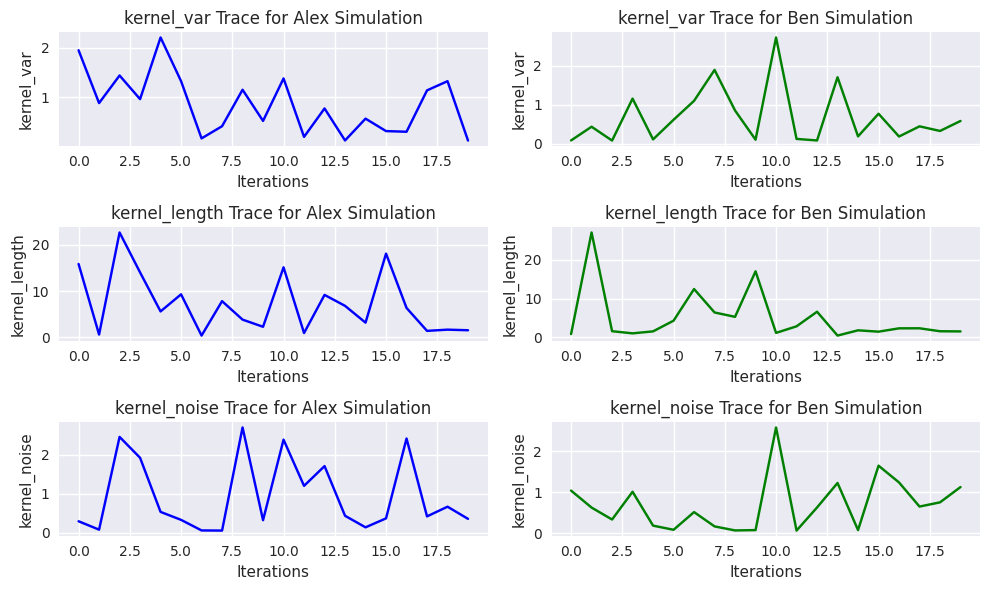

In [9]:
hyperparameter_names=['kernel_var', 'kernel_length', 'kernel_noise']

fig, axes = plt.subplots(len(hyperparameter_names), 2, figsize=(10, 6))

for i, name in enumerate(hyperparameter_names):
    # Hyperparameters for simulation 1
    ax1 = axes[i, 0]
    ax1.plot(alex_data[5 + i], label=f'{name} (Alex)', color='blue')
    ax1.set_title(f"{name} Trace for Alex Simulation")
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel(f"{name}")

    # Hyperparameters for simulation 2
    ax2 = axes[i, 1]
    ax2.plot(ben_data[5 + i], label=f'{name} (Ben)', color='green')
    ax2.set_title(f"{name} Trace for Ben Simulation")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel(f"{name}")

plt.tight_layout()
plt.show()

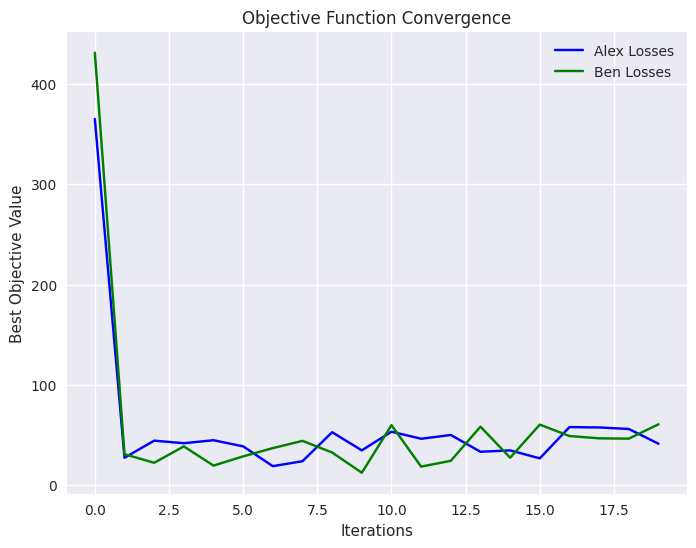

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(alex_data[4], label="Alex Losses", color='blue')
plt.plot(ben_data[4], label="Ben Losses", color='green')
plt.xlabel("Iterations")
plt.ylabel("Best Objective Value")
plt.title("Objective Function Convergence")
plt.legend()
plt.grid(True)
plt.show()